In [6]:
import pandas as pd

causas = [
    "I219", "J189", "E149"
]


# Cargar el archivo por partes y filtrar
chunks = pd.read_csv('../defunciones_clean.csv', chunksize=50000)
filtered = pd.concat([chunk[chunk["causa"].isin(causas)] for chunk in chunks])

# Guardar nuevo archivo
filtered.to_csv("defunciones_filtradas.csv", index=False)


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1. Cargar el dataset
df = pd.read_csv("defunciones_filtradas.csv")

# 2. Nombre de la columna objetivo
target_col = "causa"  # Ajusta si tu columna tiene otro nombre

# 3. Preprocesamiento
X = df.drop(columns=[target_col], errors="ignore")
y = df[target_col]

# Codificar variables categóricas
X = pd.get_dummies(X)

# Rellenar NaNs con 0
X = X.fillna(0)

# Codificar la columna objetivo
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Escalar las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Definir función para entrenar RNA
def entrenar_rna(X_train, X_test, y_train, y_test):
    modelo = MLPClassifier(hidden_layer_sizes=(30,), max_iter=200, random_state=42)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=le.classes_)
    return acc, report

# 5. Crear las tres particiones
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X_scaled, y_encoded, test_size=0.30, random_state=42)

# 6. Entrenar y evaluar con cada partición
acc_70, report_70 = entrenar_rna(X_train_70, X_test_70, y_train_70, y_test_70)

# 7. Mostrar resultados
print(f"70/30 - Accuracy: {acc_70:.2f}")
print(report_70)


C:\Users\jemil\AppData\Local\Temp\ipykernel_27208\3874471373.py:8: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("defunciones_filtradas.csv")


70/30 - Accuracy: 0.60
              precision    recall  f1-score   support

        E149       0.51      0.37      0.43     10038
        I219       0.59      0.72      0.65     18579
        J189       0.68      0.61      0.64     14100

    accuracy                           0.60     42717
   macro avg       0.59      0.57      0.57     42717
weighted avg       0.60      0.60      0.59     42717



In [2]:
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X_scaled, y_encoded, test_size=0.20, random_state=42)
acc_80, report_80 = entrenar_rna(X_train_80, X_test_80, y_train_80, y_test_80)
print(f"80/20 - Accuracy: {acc_80:.2f}")
print(report_80)

80/20 - Accuracy: 0.60
              precision    recall  f1-score   support

        E149       0.52      0.37      0.43      6711
        I219       0.59      0.70      0.64     12316
        J189       0.66      0.63      0.65      9451

    accuracy                           0.60     28478
   macro avg       0.59      0.57      0.57     28478
weighted avg       0.60      0.60      0.59     28478



In [3]:
X_train_85, X_test_85, y_train_85, y_test_85 = train_test_split(X_scaled, y_encoded, test_size=0.15, random_state=42)
acc_85, report_85 = entrenar_rna(X_train_85, X_test_85, y_train_85, y_test_85)
print(f"85/15 - Accuracy: {acc_85:.2f}")
print(report_85)

85/15 - Accuracy: 0.60
              precision    recall  f1-score   support

        E149       0.51      0.44      0.47      5088
        I219       0.60      0.67      0.63      9168
        J189       0.67      0.62      0.65      7103

    accuracy                           0.60     21359
   macro avg       0.59      0.58      0.58     21359
weighted avg       0.60      0.60      0.60     21359



Se evaluó el rendimiento de una Red Neuronal Artificial (RNA) entrenada para predecir la causa de muerte en función de las características del paciente, utilizando tres particiones diferentes de entrenamiento y prueba: 70/30, 80/20 y 85/15. En los tres escenarios, el modelo alcanzó una precisión general (accuracy) del 60%, lo que indica una estabilidad en el desempeño general independientemente del tamaño del conjunto de entrenamiento.

En términos de desempeño por clase (según el código CIE-10), se observa que la clase I219 (infarto agudo del miocardio) mantiene consistentemente el mejor desempeño con f1-scores entre 0.63 y 0.65, lo que sugiere que la red neuronal logra identificar esta causa de manera efectiva. La clase J189 (neumonía no especificada) también se predice de forma consistente, con f1-scores alrededor de 0.64–0.65 en todas las particiones. Por otro lado, E149 (diabetes mellitus no especificada) es la clase con menor rendimiento, aunque muestra una leve mejora en la partición 85/15 (f1-score de 0.47).

En conclusión, si bien el accuracy se mantiene constante, el uso del 85% de datos para entrenamiento mejora ligeramente la predicción de la clase más débil (diabetes), lo cual puede ser importante si se desea un modelo más balanceado. Por tanto, la configuración 85/15 podría considerarse la mejor opción en este caso, especialmente si el objetivo es capturar mejor todas las clases.

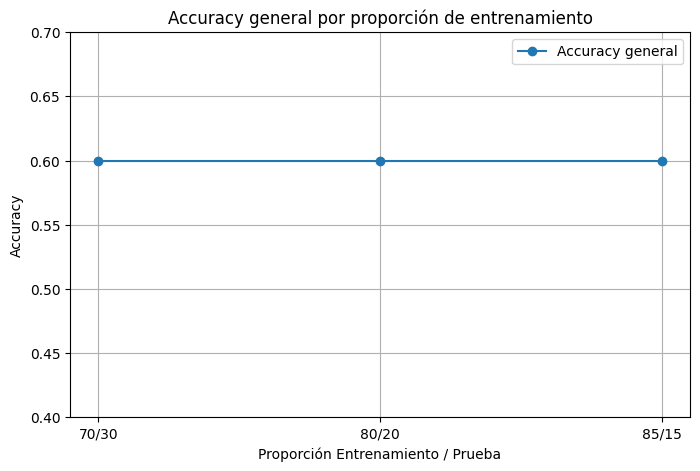

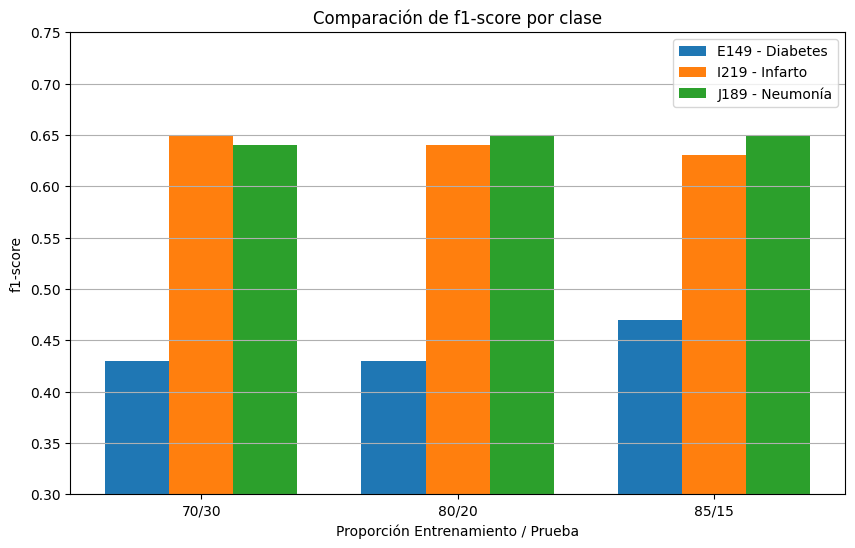

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Datos extraídos de los reportes
proporciones = ['70/30', '80/20', '85/15']
accuracy = [0.60, 0.60, 0.60]

f1_diabetes = [0.43, 0.43, 0.47]
f1_infarto = [0.65, 0.64, 0.63]
f1_neumonia = [0.64, 0.65, 0.65]

# === Gráfico de Accuracy general ===
plt.figure(figsize=(8, 5))
plt.plot(proporciones, accuracy, marker='o', label='Accuracy general')
plt.ylim(0.4, 0.7)
plt.title('Accuracy general por proporción de entrenamiento')
plt.ylabel('Accuracy')
plt.xlabel('Proporción Entrenamiento / Prueba')
plt.grid(True)
plt.legend()
plt.show()

# === Gráfico de f1-score por clase ===
x = np.arange(len(proporciones))
width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - width, f1_diabetes, width, label='E149 - Diabetes')
plt.bar(x, f1_infarto, width, label='I219 - Infarto')
plt.bar(x + width, f1_neumonia, width, label='J189 - Neumonía')

plt.xticks(x, proporciones)
plt.ylim(0.3, 0.75)
plt.title('Comparación de f1-score por clase')
plt.xlabel('Proporción Entrenamiento / Prueba')
plt.ylabel('f1-score')
plt.legend()
plt.grid(axis='y')
plt.show()
